# 9.1 python基本I/O 

## 9.1.1用pickle将对象写入磁盘 

In [1]:
import pickle
import numpy as np
from random import gauss
a = [gauss(1.5,2) for i in range(10000)]#以正态分布生成10000个随机数的列表
path = 'D:/Users/MERRY/Jupyter/python金融大数据分析（edition 2）/'#指定储存路径

### 存储和读取单个对象 

In [2]:
pkl_file = open(path + 'data.pkl','wb')#为二进制写入模式(wb)打开文件
pickle.dump(a,pkl_file)#将a序列化并保存到路径
pkl_file.close()#关闭文件

In [3]:
pkl_file = open(path + 'data.pkl','rb')#为二进制打开模式(rb)打开文件
b = pickle.load(pkl_file)#读取文件
print(a[:3])
print(b[:3])
np.allclose(np.array(a),np.array(b))#将a和b转成ndarray对象，并验证两个对象是否包括相同数据

[3.423421905183841, 1.977660303451337, 2.666929618936769]
[3.423421905183841, 1.977660303451337, 2.666929618936769]


True

### 存储和读取多个对象 (按照先进先出FIFO)

In [8]:
pkl_file = open(path + 'data.pkl','wb')
pickle.dump(np.array(a),pkl_file)#写入a的ndarray版本
pickle.dump(np.array(a)**2,pkl_file)
pkl_file.close()

In [9]:
pkl_file = open(path + 'data.pkl','rb')
x = pickle.load(pkl_file)
print(x[:4])
y = pickle.load(pkl_file)
print(y[:4])


[ 3.42342191  1.9776603   2.66692962 -0.39403619]
[11.71981754  3.91114028  7.11251359  0.15526452]


### 用字典存储和读取多个对象

In [10]:
pkl_file = open(path + 'data.pkl','wb')#以写入模式打开文件
pickle.dump({'x':x,"y":y},pkl_file)#以字典的方式将xy写入
pkl_file.close()#关闭文件
pkl_file = open(path + 'data.pkl','rb')#以读取的方式打开文件
data = pickle.load(pkl_file)#读取字典对象
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])



x [ 3.42342191  1.9776603   2.66692962 -0.39403619]
y [11.71981754  3.91114028  7.11251359  0.15526452]


## 9.1.2 读取和写入文本文件(CSV)

### 以ndarry和dateindex创建模拟数据

In [12]:
import pandas as pd
rows = 5000 #5000行数据
a = np.random.standard_normal((rows,5)).round(4)#生成正态分布数据5000行，每行5个，保留4位小数
t = pd.date_range(start='2020/1/1',periods=rows,freq='H')#生成时期索引，间隔为一小时
print(a[:4,:])
t

[[-1.8655  0.6139 -1.1108 -1.1702  1.971 ]
 [-0.0815 -0.4315 -0.6852 -0.239   0.9434]
 [ 0.5019 -0.2904  0.8814  0.6724  1.712 ]
 [-2.1366  0.1729  1.1794  0.5216  2.8343]]


DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-07-26 22:00:00', '2020-07-26 23:00:00',
               '2020-07-27 00:00:00', '2020-07-27 01:00:00',
               '2020-07-27 02:00:00', '2020-07-27 03:00:00',
               '2020-07-27 04:00:00', '2020-07-27 05:00:00',
               '2020-07-27 06:00:00', '2020-07-27 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

### 将数据存入csv文件

In [13]:
csv_file = open(path + 'data.csv','w')#以读取的方式打开文件
header = 'data,no1,no2,no3,no4,no5\n'
csv_file.write(header)#将列标签作为第一行写入
for t_,(no1,no2,no3,no4,no5) in zip(t,a):
    s = '{},{},{},{},{},{}\n'.format(t_,no1,no2,no3,no4,no5)#按行合并数据，转化成字符串类型
    csv_file.write(s)#按行写入字符串
csv_file.close()


### 读取csv文件，返回列表对象

In [14]:
import csv
with open(path + 'data.csv','r') as f:
    csv_reader = csv.reader(f)#将每一行当一个列表对象返回
    lines = [line for line in csv_reader]
lines[:5]

[['data', 'no1', 'no2', 'no3', 'no4', 'no5'],
 ['2020-01-01 00:00:00', '-1.8655', '0.6139', '-1.1108', '-1.1702', '1.971'],
 ['2020-01-01 01:00:00', '-0.0815', '-0.4315', '-0.6852', '-0.239', '0.9434'],
 ['2020-01-01 02:00:00', '0.5019', '-0.2904', '0.8814', '0.6724', '1.712'],
 ['2020-01-01 03:00:00', '-2.1366', '0.1729', '1.1794', '0.5216', '2.8343']]

### 读取csv，返回字典对象

In [15]:
import csv
with open(path + 'data.csv','r') as f:
    csv_reader = csv.DictReader(f)#将每一行当一个列表对象返回
    lines = [line for line in csv_reader]
lines[:5]

[{'data': '2020-01-01 00:00:00',
  'no1': '-1.8655',
  'no2': '0.6139',
  'no3': '-1.1108',
  'no4': '-1.1702',
  'no5': '1.971'},
 {'data': '2020-01-01 01:00:00',
  'no1': '-0.0815',
  'no2': '-0.4315',
  'no3': '-0.6852',
  'no4': '-0.239',
  'no5': '0.9434'},
 {'data': '2020-01-01 02:00:00',
  'no1': '0.5019',
  'no2': '-0.2904',
  'no3': '0.8814',
  'no4': '0.6724',
  'no5': '1.712'},
 {'data': '2020-01-01 03:00:00',
  'no1': '-2.1366',
  'no2': '0.1729',
  'no3': '1.1794',
  'no4': '0.5216',
  'no5': '2.8343'},
 {'data': '2020-01-01 04:00:00',
  'no1': '0.1684',
  'no2': '-2.348',
  'no3': '-0.6417',
  'no4': '1.8987',
  'no5': '-0.5316'}]

## 9.1.3使用SQL数据库 

In [16]:
import sqlite3 as sq3

In [17]:
con = sq3.connect(path + 'numbs.db')#打开一个数据连接，如果不存在就创建一个
query = 'CREATE TABLE numbs(Date date,No1 real,No2 real)'#sql语令，创建包含3列的表
con.execute(query)#执行query
con.commit()#提交更改
q = con.execute
q('SELECT * FROM sqlite_master').fetchall()#将创建的表显示为单个对象

[('table',
  'numbs',
  'numbs',
  2,
  'CREATE TABLE numbs(Date date,No1 real,No2 real)')]

In [19]:
import datetime
np.random.seed(100)
data = np.random.standard_normal((10000,2)).round(4)
%time
for row in data:
    now = datetime.datetime.now()#获取当前时间
    q('INSERT INTO numbs VALUES(?,?,?)',(now,row[0],row[1]))#写入数据
con.commit()
q('SELECT * FROM numbs').fetchmany(4)#插入数据


Wall time: 0 ns


[('2022-03-03 18:38:15.160683', -1.7498, 0.3427),
 ('2022-03-03 18:38:15.160683', 1.153, -0.2524),
 ('2022-03-03 18:38:15.160683', 0.9813, 0.5142),
 ('2022-03-03 18:38:15.160683', 0.2212, -1.07)]

## 9.1.4读写numpy数组

1. 写入numpy

`np.save(path + 'arry,data)`
2. 读取numpy数据

`np.load(path + 'array.npy')`

# 9.2 pandas的I/O 

1. pd.read_csv() \
   pd.to_csv()
2. pd.read_excel() \
   pd.to_excel() 
3. pd.read_hdf()   HDFS数据库 \
   pd.to_hdf() 
4. sql 
5. json **javascript标记对象**
6. msgpack **可移植二进制模式**
7. html
8. gbq  **Google big query模式**
9. stata  **格式104、105、108**
10. clipboard  **html页面**
11. pickle  **结构化python对象**

# 9.3 PyTables的I/O 

In [20]:
import tables as tb#该库的导入名称为tables
import datetime as dt

## 9.3.1 使用表 

In [50]:
filename = 'pytab.h5'
h5 = tb.open_file(filename,'w')#以二进制模式打开文件
row_des = {
    'Date':tb.StringCol(26,pos=1),#date列设置为字符串模式
    'No1':tb.IntCol(pos=2),
    'No2':tb.IntCol(pos=3),#两个int列
    'No3':tb.Float64Col(pos=4),
    'No4':tb.Float64Col(pos=5)#两个浮点列

}
rows = 200000
filters = tb.Filters(complevel=0)#指定压缩级别
tab = h5.create_table('/','ints_floats',#表的路径和技术名称
                      row_des,#行数据结构描述
                     title='INT and FLOAT',#表名
                     expectedrows=rows,#预期的行数
                     filters=filters #用于该表的Filters对象
                     )
tab

ValueError: The file 'pytab.h5' is already opened.  Please close it before reopening in write mode.

In [49]:
h5.close()

#  9.4 TsTables的I/O

## 9.4.1 样板数据 

### 基于几何布朗运动模拟金融时间序列 

In [24]:
no = 5000000
co = 3
interval = 1. / (12 * 30 * 24 * 60)#以年表示时间间隔
vol = 0.2#波动率
rn = np.random.standard_normal((no,co))#生成3个时间序列，每个序列有5000000个时间数据
rn[0] = 0.0#将初始随机值设为0
paths = 100 * np.exp(np.cumsum(-0.5 * vol ** 2 * interval + 
                              vol * np.sqrt(interval) * rn,axis=0))#基于欧拉离散的模拟
paths[0] = 100#将初始路径设置为100

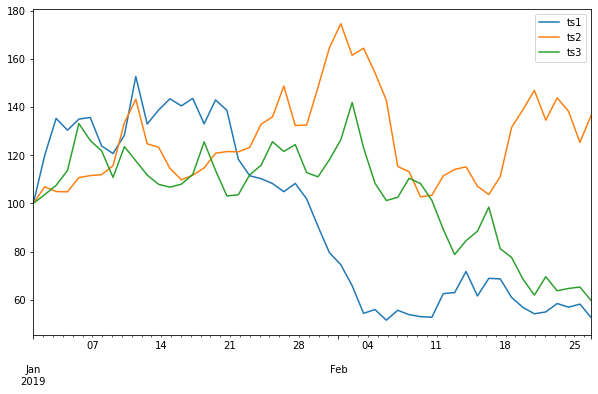

In [29]:
dr = pd.date_range('2019-1-1',periods=no,freq='1s')#以秒为间隔设置时间
df = pd.DataFrame(paths, index=dr,columns=['ts1','ts2','ts3'])#将模拟后的数据导入
df.head()
df[::100000].plot(figsize=(10,6))


## 9.4.2 数据存储 

In [31]:
import tstables as tstab #该软件包增加create_ts()

In [47]:
class ts_desc(tb.IsDescription):
    timestamp = tb.Int64Col(pos=0)
    ts1 = tb.Float64Col(pos=1)    
    ts2 = tb.Float64Col(pos=2)
    ts3 = tb.Float64Col(pos=3)
h5 = tb.open_file( 'tstab.h5','w')#打开文件
ts = h5.create_ts('/','ts',ts_desc)#根据ts_desc对象创建tstable对象
ts.append(df)#将dataframe对象附加到tstable对象中
tstables.tstable.TsTable
tb

ValueError: The file 'tstab.h5' is already opened.  Please close it before reopening in write mode.